In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

Check for Missing Value

In [3]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value,missing_value_percent],axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values',1:'% Value'})
    cm = sns.light_palette('orange',as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

missing_value_table(netflix)

,Missing Values,% Value
director,2634,29
country,831,9
cast,825,9
date_added,10,0
rating,4,0
duration,3,0
show_id,0,0
type,0,0
title,0,0
release_year,0,0


In [4]:
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

In [5]:
netflix[['rating','country']].isna().sum()

rating     0
country    0
dtype: int64

Showing Some Data

In [6]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Showing Some Information on this Data

In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


View a Description of this Data

In [9]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


View Shape of Data

In [10]:
netflix.shape

(8807, 12)

Display the last Data in the Table

In [11]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Rading the columns of the Data

In [12]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
netflix.loc[10:190]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,United States,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
186,s187,TV Show,Hometown Cha-Cha-Cha,NaN,"Shin Min-a, Kim Seon-ho, Lee Sang-yi, Gong Min...",United States,"August 29, 2021",2021,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A big-city dentist opens up a practice in a cl...
187,s188,TV Show,The Ingenuity of the Househusband,NaN,Kenjiro Tsuda,United States,"August 29, 2021",2021,TV-G,1 Season,"International TV Shows, TV Comedies",A tough guy with a knack for housework tackles...
188,s189,Movie,2 Alone in Paris,"Ramzy Bedia, Éric Judor","Ramzy Bedia, Éric Judor, Benoît Magimel, Krist...",France,"August 28, 2021",2008,TV-MA,97 min,"Comedies, International Movies",A bumbling Paris policeman is doggedly determi...
189,s190,TV Show,Bread Barbershop,NaN,"Um Sang-hyun, Park Yoon-hee, Kang Shi-hyun, Ho...",United States,"August 28, 2021",2020,TV-Y,2 Seasons,"Kids' TV, TV Comedies","In a town filled with food, Bread is a master ..."


In [14]:
netflix_shows = netflix[netflix['type'] == 'TV Show']

In [15]:
netflix_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [16]:
netflix_movies = netflix[netflix['type'] == 'Movie']

Using Matplotlib and Seaborn to show Data

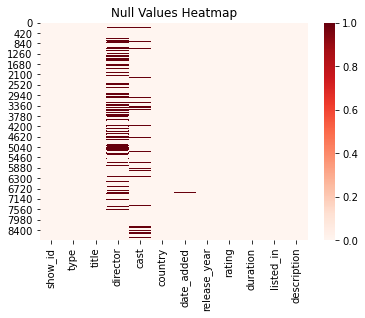

In [17]:
sns.heatmap(netflix.isnull(),cmap='Reds')
plt.title('Null Values Heatmap')
plt.show()

Plot the Columns to Show some Details and Data

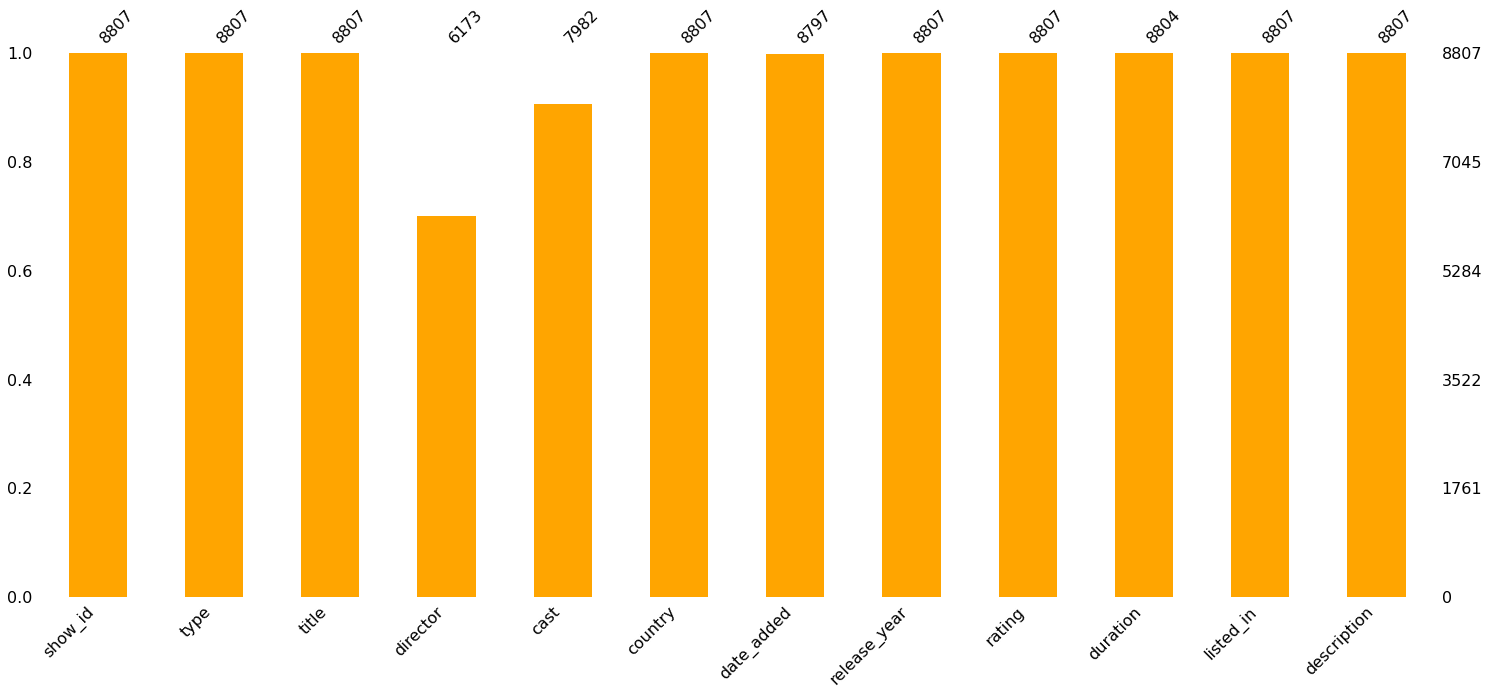

In [18]:
import missingno as msno
msno.bar(netflix,color='orange')
plt.show()

Drop Id Column

In [19]:
netflix.drop('show_id',axis=1,inplace=True)

Replace null Values in date_added with Jan 1, {release_year}

In [20]:
netflix['date_added'] = netflix['date_added'].fillna('January 1, {}'.format(str(netflix['release_year'].mode()[0])))

In [21]:
netflix['release_month'] = netflix['date_added'].apply(lambda x:x.lstrip().split(" ")[0])
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September


In [22]:
netflix['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Replace null Values in rating with TV-MA

In [23]:
netflix['rating'].replace(np.nan,'TV-MA',inplace=True)

In [24]:
netflix['country'].value_counts()

United States                                                  3649
India                                                           972
United Kingdom                                                  419
Japan                                                           245
South Korea                                                     199
                                                               ... 
Australia, New Zealand                                            1
United States, Cambodia, Romania                                  1
Canada, United Kingdom, Netherlands                               1
Hong Kong, Canada, United States                                  1
Ireland, Switzerland, United Kingdom, France, United States       1
Name: country, Length: 748, dtype: int64

Using Visualization to Define Data

Movie      6131
TV Show    2676
Name: type, dtype: int64


C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


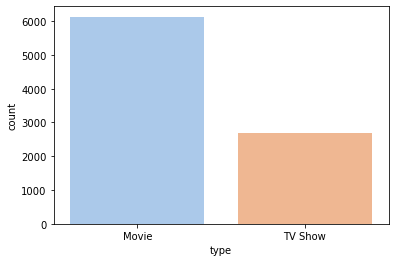

In [25]:
print(netflix.type.value_counts())
sns.countplot(netflix.type,palette='pastel')
plt.show()

Make a Analysis

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


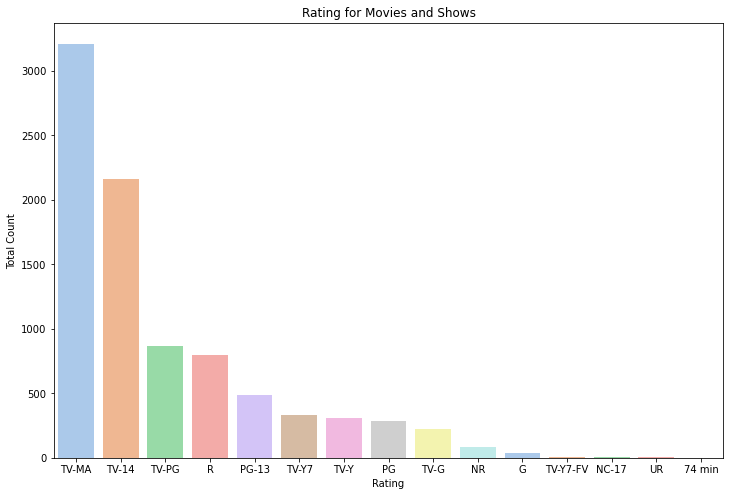

In [26]:
rating_counts = netflix.rating.value_counts()
print(rating_counts)
plt.figure(figsize=(12,8))
sns.countplot(netflix.rating,order=rating_counts.index[0:15],palette='pastel')
plt.title('Rating for Movies and Shows')
plt.xlabel('Rating')
plt.ylabel('Total Count')
plt.show()

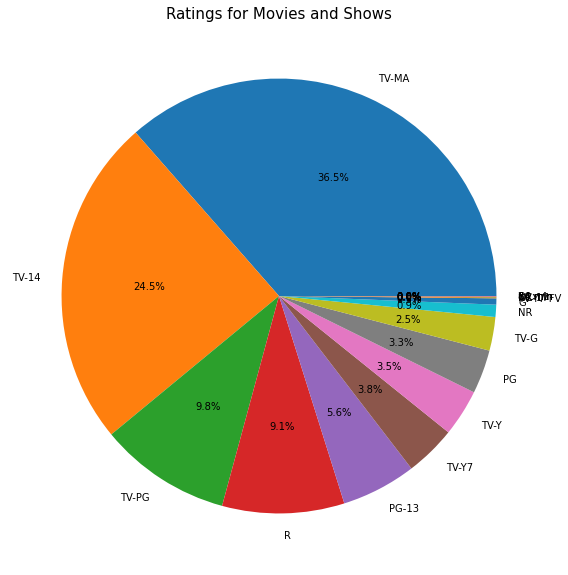

In [27]:
sizes = rating_counts.values
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=rating_counts.index,autopct='%1.1f%%')
plt.title('Ratings for Movies and Shows',fontsize=15)
plt.show()

Type-Rating

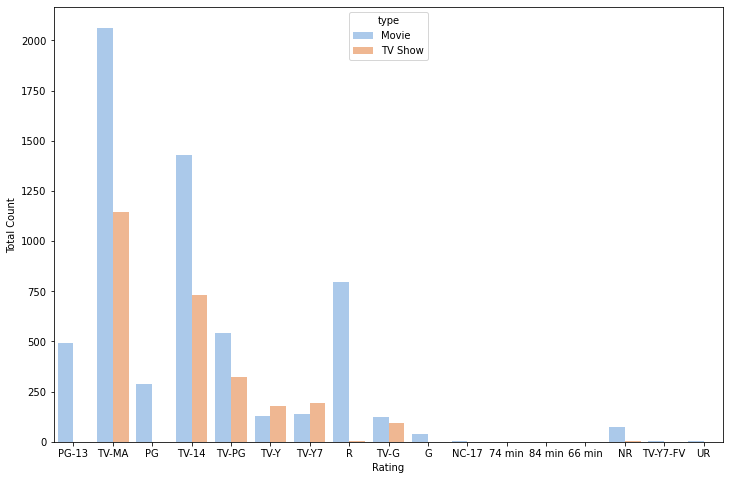

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=netflix,hue='type',palette='pastel')
plt.xlabel('Rating')
plt.ylabel('Total Count')
plt.show()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64


C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


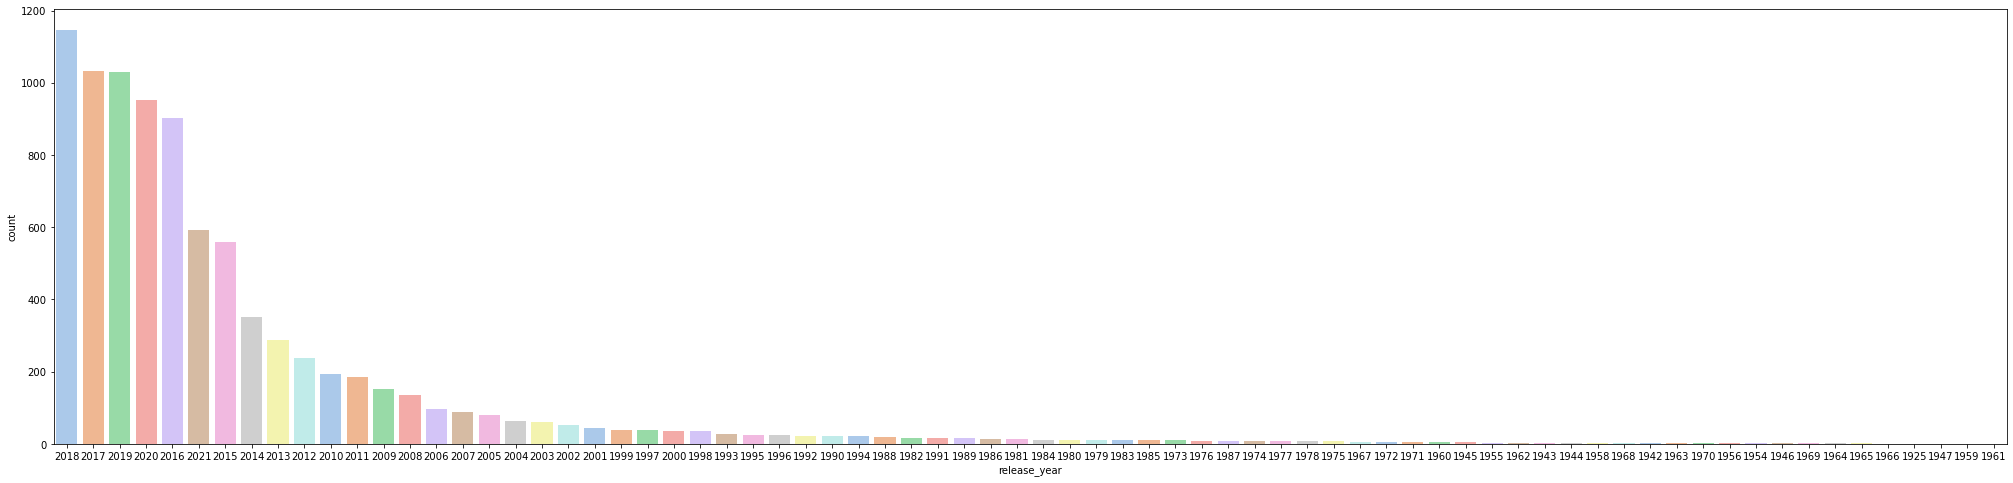

In [29]:
release_year_counts = netflix.release_year.value_counts()
print(release_year_counts)
plt.figure(figsize=(35,8))
sns.countplot(netflix.release_year,order=release_year_counts.index[0:94],palette='pastel')
plt.show()

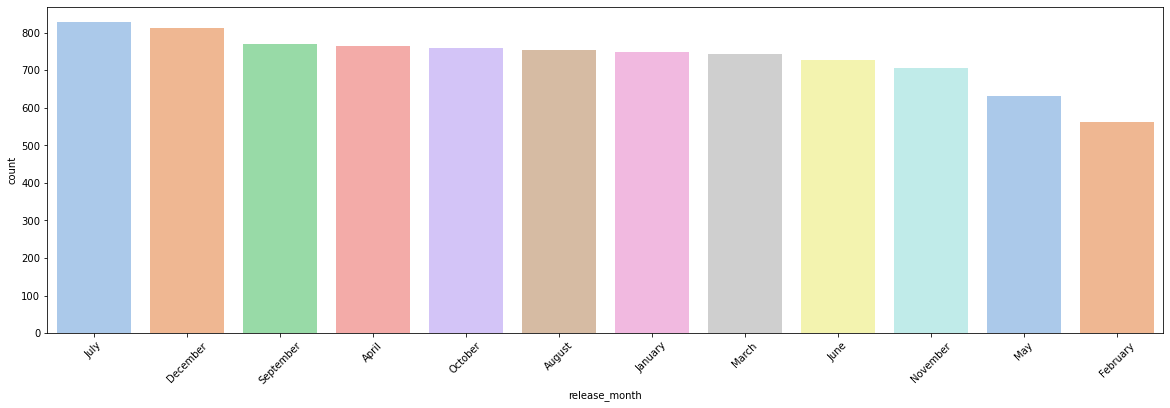

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(x='release_month',data=netflix,order=netflix['release_month'].value_counts().index[0:12],palette='pastel')
plt.xticks(rotation=45)
plt.show()

United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64


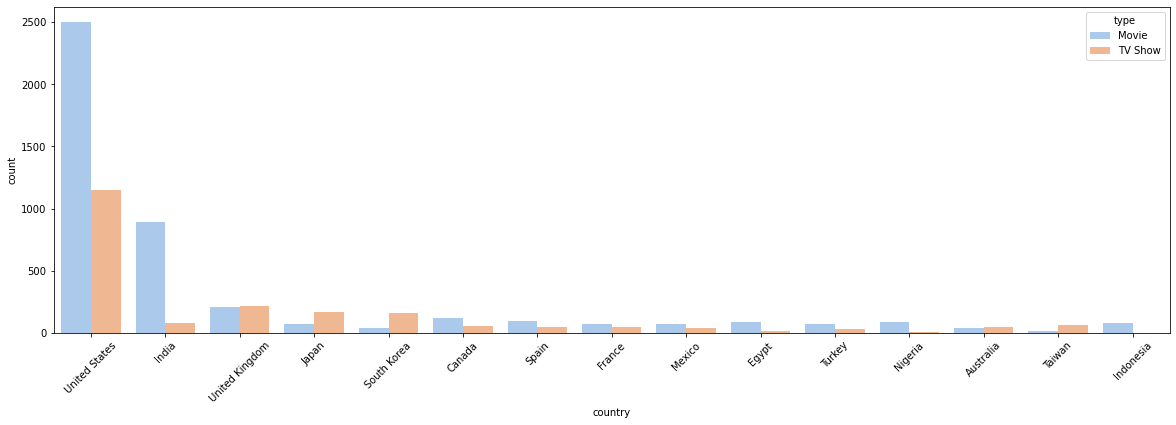

In [31]:
print(netflix['country'].value_counts().head())
plt.figure(figsize=(20,6))
sns.countplot(x='country',data=netflix,hue='type',order=netflix['country'].value_counts().index[0:15],palette='pastel')
plt.xticks(rotation=45)
plt.show()

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: listed_in, dtype: int64


Text(0, 0.5, 'Genre')

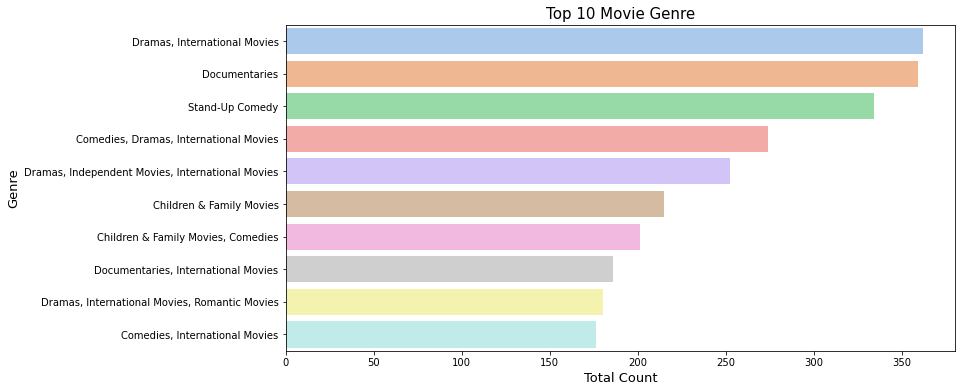

In [32]:
print(netflix_movies['listed_in'].value_counts()[:10])
plt.figure(figsize=(12,6))
sns.countplot(y='listed_in',data=netflix_movies,order=netflix_movies['listed_in'].value_counts().index[0:10],palette='pastel')
plt.title('Top 10 Movie Genre',size=15)
plt.xlabel('Total Count',fontsize=13)
plt.ylabel('Genre',fontsize=13)

Text(0, 0.5, 'Genre')

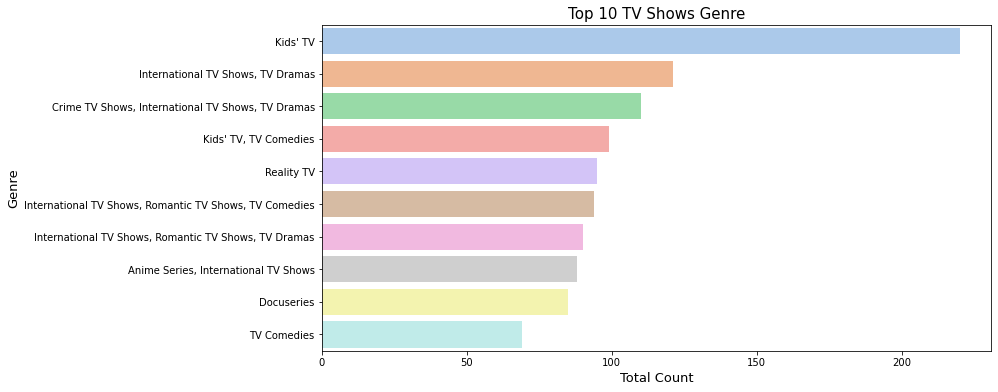

In [33]:
Tv_Show_genre = netflix.loc[netflix['type']=='TV Show']
plt.figure(figsize=(12,6))
ax = sns.countplot(y='listed_in',data=Tv_Show_genre,order=Tv_Show_genre['listed_in'].value_counts().index[0:10],palette='pastel')
plt.title('Top 10 TV Shows Genre',fontsize=15)
plt.xlabel('Total Count',fontsize=13)
plt.ylabel('Genre',fontsize=13)

In [34]:
netflix.duration = netflix.duration.dropna(inplace=True)

In [35]:
netflix_movies.duration = netflix_movies.duration.str.replace(' min','')
netflix_shows.rename(columns={'duration':'seasons'},inplace=True)
netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}},inplace=True)
netflix_shows.seasons = netflix_shows.seasons.str.replace(' Seasons','')

C:\Users\shirl\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\shirl\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\shirl\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-36-924e9fcd05da>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


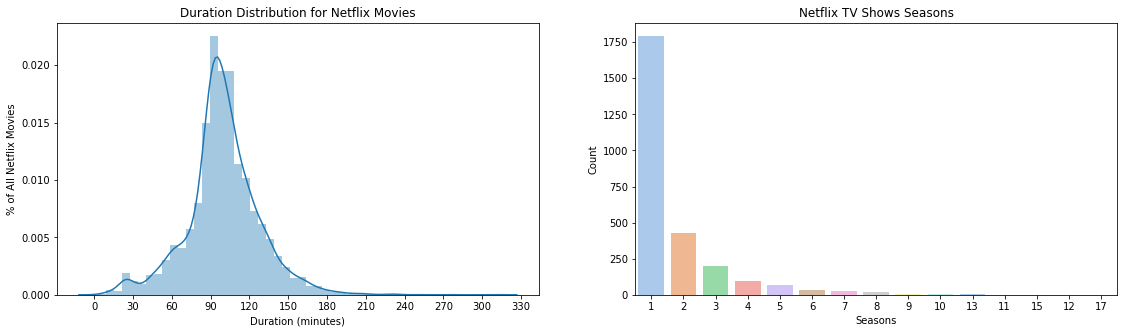

In [36]:
fig, ax = plt.subplots(1,2,figsize=(19,5))
g1 = sns.distplot(netflix_movies.duration,ax=ax[0])
g1.set_xticks(np.arange(0,360,30))
g1.set_title('Duration Distribution for Netflix Movies')
g1.set_ylabel('% of All Netflix Movies')
g1.set_xlabel('Duration (minutes)')
g2 = sns.countplot(netflix_shows.seasons,ax=ax[1],order=netflix_shows['seasons'].value_counts().index,palette='pastel')
g2.set_title('Netflix TV Shows Seasons')
g2.set_xlabel('Seasons')
g2.set_ylabel('Count')
fig.show()

In [37]:
oldest = netflix.sort_values('release_year',ascending=True)
oldest[['title','release_year']][:10]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


In [38]:
standup = netflix[netflix['listed_in'] == 'Stand-Up Comedy']
standup[['title','country','release_year']].head(10)

,title,country,release_year
278,Lokillo: Nothing's the Same,Colombia,2021
359,The Original Kings of Comedy,United States,2000
475,The Stand-Up,United States,2019
484,Lee Su-geun: The Sense Coach,United States,2021
766,Alan Saldaña: Locked Up,Mexico,2021
826,Bo Burnham: Inside,United States,2021
838,Soy Rada: Serendipity,Argentina,2021
1172,Loyiso Gola: Unlearning,South Africa,2021
1189,Nate Bargatze: The Greatest Average American,United States,2021
1191,The Fluffy Movie,United States,2014


In [39]:
kids = netflix[netflix['listed_in'] == "Kids' TV"]
kids[['title','country','release_year']].head(10)

,title,country,release_year
34,Tayo and Little Wizards,United States,2020
39,Chhota Bheem,India,2021
65,Numberblocks,United Kingdom,2021
89,Mighty Raju,United States,2017
100,Tobot Galaxy Detectives,United States,2019
111,Sharkdog,"United States, Singapore",2021
123,Luv Kushh,United States,2012
153,Kid-E-Cats,Russia,2016
254,Go! Go! Cory Carson,United States,2021
263,Mother Goose Club,United States,2016


Text(0, 0.5, 'Total Count')

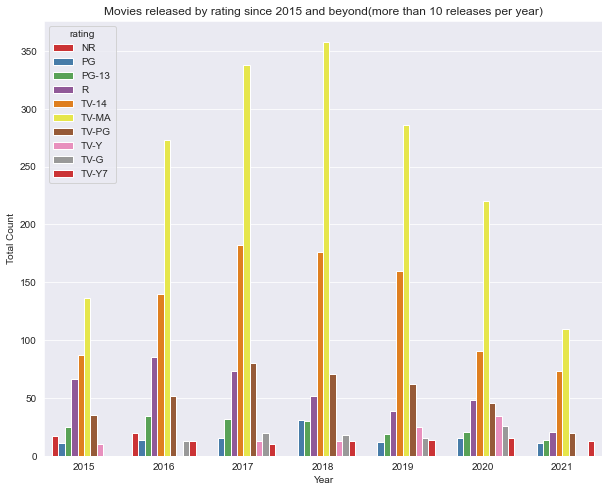

In [41]:
movie = netflix.loc[netflix['type'] == 'Movie']
movie_trends = movie[movie['release_year'] >= 2015]
df = movie_trends.groupby(['release_year','rating']).size().reset_index(name='Total')
df1 = df[df['Total'] >= 10]

plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(data=df1,x='release_year',y='Total',hue='rating',palette='Set1')
plt.title('Movies released by rating since 2015 and beyond(more than 10 releases per year)')
plt.xlabel('Year')
plt.ylabel('Total Count')


Text(0, 0.5, 'Number of Shows')

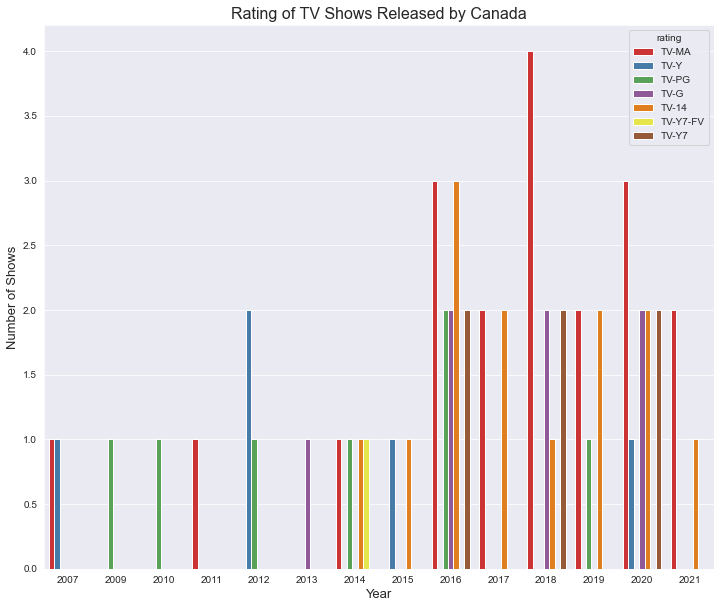

In [42]:

tv_show_Canada = netflix[(netflix['type'] == 'TV Show') & (netflix['country'] == 'Canada')]
tv_show_Canada = tv_show_Canada[tv_show_Canada['release_year']>=2007]
df = tv_show_Canada.groupby(['release_year','rating']).size().reset_index(name='Total')
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.barplot(data=df,x='release_year',y='Total',hue='rating',palette='Set1')
plt.title('Rating of TV Shows Released by Canada',fontsize=16)
plt.xlabel('Year',fontsize=13)
plt.ylabel('Number of Shows',fontsize=13)

Text(0, 0.5, 'Number of Shows')

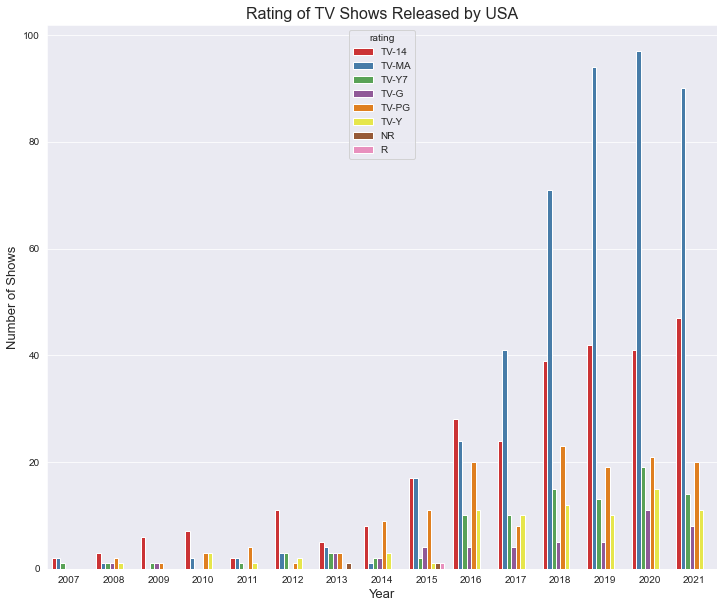

In [43]:
tv_show_USA = netflix[(netflix['type'] == 'TV Show') & (netflix['country'] == 'United States')]
tv_show_USA = tv_show_USA[tv_show_USA['release_year']>=2007]
df = tv_show_USA.groupby(['release_year','rating']).size().reset_index(name='Total')
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.barplot(data=df,x='release_year',y='Total',hue='rating',palette='Set1')
plt.title('Rating of TV Shows Released by USA',fontsize=16)
plt.xlabel('Year',fontsize=13)
plt.ylabel('Number of Shows',fontsize=13)

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

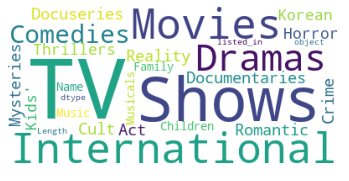

In [64]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords=stopwords,
                     max_words=300,
                     max_font_size=100,
                     random_state=500).generate(str(netflix['listed_in']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()